<a href="https://colab.research.google.com/github/AnnaSakuchanova/Image_Classification_Dense_Neural_Network/blob/main/Image_Classification_Dense_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from skimage.transform import resize
from sklearn.metrics import confusion_matrix  
from keras.utils import np_utils

In [ ]:
DATASET_path = "/content/dataset"

In [ ]:
#Желаемый размер
TARGET_WIDTH = 28
TARGET_HEIGHT = 28
#Отложите 20% на проверку и 20% на тестирование
VAL_RATIO = 0.2
TEST_RATIO = 0.2

INVERT = False

random.seed(42)

In [ ]:
##Загружать изображения как массивы Numpy

labels = []
y_all = []
X_all = []


for label in os.listdir(DATASET_path):
  class_dir = os.path.join(DATASET_path, label)
  if os.path.isdir(class_dir) and label != ".ipynb_checkpoints":
      labels.append(label)
      for i, file in enumerate(os.listdir(class_dir)):
        if file != ".ipynb_checkpoints":
            file_path = os.path.join(class_dir, file)
            img = PIL.Image.open(file_path).convert('L')
            img_array = np.asarray(img)
            if INVERT:
                img_array = 255 - img_array
            X_all.append(img_array)
            y_all.append(label)
        print("Added", str(i + 1), "images from", label)
# Рассчитать общее количество образцов
num_samples = len(X_all)

# Отсортировать список ярлыков в алфавитном порядке
labels = sorted(labels)

# Print out labels and number of samples
print(labels)
print("Number of samples:", num_samples)

Added 1 images from resistor
Added 2 images from resistor
Added 3 images from resistor
Added 4 images from resistor
Added 5 images from resistor
Added 6 images from resistor
Added 7 images from resistor
Added 8 images from resistor
Added 9 images from resistor
Added 10 images from resistor
Added 11 images from resistor
Added 12 images from resistor
Added 13 images from resistor
Added 14 images from resistor
Added 15 images from resistor
Added 16 images from resistor
Added 17 images from resistor
Added 18 images from resistor
Added 19 images from resistor
Added 20 images from resistor
Added 21 images from resistor
Added 22 images from resistor
Added 23 images from resistor
Added 24 images from resistor
Added 25 images from resistor
Added 26 images from resistor
Added 27 images from resistor
Added 28 images from resistor
Added 29 images from resistor
Added 30 images from resistor
Added 31 images from resistor
Added 32 images from resistor
Added 33 images from resistor
Added 34 images fro

In [ ]:
#Преобразование меток в числа

#Показывать ярлыки перед преобразованием
print("Before:", y_all)

Before: ['resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'dio

In [ ]:
#Преобразуйте каждую метку в ее индекс в метках
y_out = []
for i, label in enumerate(y_all):
    y_out.append(labels.index(label))
y_all = y_out

print("After:", y_all)

After: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
##Перемешайте образцы и этикетки вместе, разделите на тестовые, проверочные и обучающие наборы

#Перемешать сэмплы и связанные с ними метки вместе

X_y = list(zip(X_all, y_all))
random.shuffle(X_y)
X_all, y_all = zip(*X_y)

In [ ]:
#Рассчитать количество проверочных и тестовых образцов, которые необходимо отложить (округлить в меньшую сторону)

num_samples_test = int(TEST_RATIO * num_samples)
num_samples_val = int(VAL_RATIO * num_samples)

In [ ]:
X_test = X_all[:num_samples_test]
y_test = y_all[:num_samples_test]

In [ ]:
X_val = X_all[num_samples_test:(num_samples_test + num_samples_val)]
y_val = y_all[num_samples_test:(num_samples_test + num_samples_val)]

In [ ]:
#Первые образцы num_samples_test из перетасованного списка становятся набором тестов

X_train = X_all[(num_samples_test + num_samples_val):]
y_train = y_all[(num_samples_test + num_samples_val):]


In [ ]:
#Запомните количество образцов в тестовом наборе

num_samples_train = len(X_train)

In [ ]:
print('Количество тестовых образцов:', num_samples_test)
print('Количество проверочных образцов:', num_samples_val)
print('Количество обучающих выборок:', num_samples_train)

Количество тестовых образцов: 50
Количество проверочных образцов: 50
Количество обучающих выборок: 150


In [ ]:
#Посмотреть один из обучающих примеров
#Выберите, какой образец вы хотите просмотреть
idx = 0
#Распечатайте метку (число и строку) и часть массива
print("Label:" + str(y_train[idx])+ "("+ labels[y_train[idx]]+ ")")
print(X_train[idx])


Label:1(capacitor)
[[158 158 158 ... 163 163 163]
 [158 158 158 ... 163 163 163]
 [158 158 157 ... 163 164 163]
 ...
 [141 141 141 ... 127 125 127]
 [141 141 141 ... 125 125 125]
 [141 141 141 ... 122 125 125]]


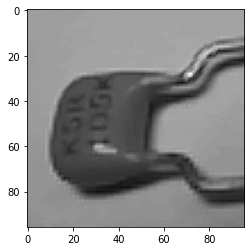

In [ ]:
#Показать изображение из массива
plt.imshow(X_train[idx],cmap = 'gray', vmin=0, vmax=255)

In [ ]:
#Функция изменения размера списка изображений
def rezise_images(images, widht, height, anti_aliasing=True):
  X_out = []
  for i, img in enumerate(images):
    X_out.append(resize(img, (height, width), anti_aliasing=anti_aliasing))
  return X_out

In [ ]:
#Масштабирование/обрезка изображений
#Изменение размера (масштабирование) всех изображений в тренировочном наборе
X_train = resize_images(X_train, TARGET_WIDTH, TARGET_HEIGHT)
#Изменение размера (масштабирование) всех изображений в проверочном наборе
X_val = resize_images(X_val, TARGET_WIDTH, TARGET_HEIGHT)
#Изменение размера (масштабирование) всех изображений в тестовом наборе
X_test = resize_images(X_test, TARGET_WIDTH, TARGET_HEIGHT)

Label: 1 (capacitor)
First row: [[0.61568627 0.61568627 0.61568627 0.61568627 0.61568627 0.61568627
  0.61568627 0.62436975 0.63137255 0.63137255 0.63137255 0.63137255
  0.63137255 0.63529412 0.63529412 0.63529412 0.63529412 0.63529412
  0.63529412 0.63529412 0.63529412 0.63529412 0.63529412 0.63529412
  0.63529412 0.63215286 0.63529412 0.63529412]]


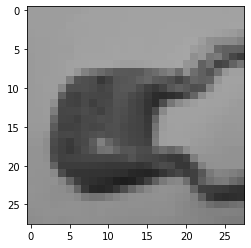

In [ ]:
#Просмотрите обучающую выборку еще раз (после того, как все они будут масштабированы)
#Выберите, какой образец вы хотите просмотреть
idx = 0
#Распечатайте метку (число и строку) и часть массива
print("Label: " + str(y_train[idx]) + " (" + labels[y_train[idx]] + ")")
print("First row:", X_train[idx][:1,:])
#Показать изображение из массива
plt.imshow(X_train[idx],cmap = 'gray', vmin=0, vmax=1)

In [ ]:
#Преобразование списка образцов и меток в массивы Numpy
# Обучающий набор
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Набор проверки
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

# Тестовый набор
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# Распечатайте новые формы массива Numpy (всегда рекомендуется проверять формы!)
print("Training X:", X_train.shape)
print("Training y:", y_train.shape)
print("Validation X:", X_val.shape)
print("Validation y:", y_val.shape)
print("Test X:", X_test.shape)
print("Test y:", y_test.shape)

Training X: (150, 28, 28)
Training y: (150,)
Validation X: (50, 28, 28)
Validation y: (50,)
Test X: (50, 28, 28)
Test y: (50,)


In [ ]:
#Сгладить каждое изображение к одномерному вектору (DNN требует одномерного ввода)
#Вычислите длину одномерного массива, к которому мы будем сглаживать каждое изображение
len_vector = TARGET_WIDTH * TARGET_WIDTH
#Свести матрицы к векторам
X_train = X_train.reshape(num_samples_train, len_vector)
X_val = X_val.reshape(num_samples_val, len_vector)
X_test = X_test.reshape(num_samples_test, len_vector)
#Определите входную форму для нашей модели Keras (должен быть кортеж)
input_shape = (X_train.shape[1],)
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X val:", X_val.shape)
print("y val:", y_val.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)
print("Input tensor shape:", input_shape)

X train: (150, 784)
y train: (150,)
X val: (50, 784)
y val: (50,)
X test: (50, 784)
y test: (50,)
Input tensor shape: (784,)


In [ ]:
#Преобразование меток (целых чисел) в однократное кодирование
#Получить количество классов
num_classes = len(labels)
#Используйте Keras np_utils для создания однократного кодирования (обратите внимание на заглавную букву «Y» — 2D-массив)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
#Распечатайте фигуры (заглавная буква «Y» — наша горячая матрица!)
print("Y train:", Y_train.shape)
print("Y val:", Y_val.shape)
print("Y test:", Y_test.shape)
#Распечатайте несколько примеров из тренировочного набора
for i in range(10):
  print("Label: " + str(y_train[i]) + " | One-hot:", Y_train[i])

Y train: (150, 5)
Y val: (50, 5)
Y test: (50, 5)
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0.]
Label: 4 | One-hot: [0. 0. 0. 0. 1.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 3 | One-hot: [0. 0. 0. 1. 0.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 4 | One-hot: [0. 0. 0. 0. 1.]


In [ ]:
#Построить модель Кераса
#Последовательная модель представляет собой линейный набор слоев
model = Sequential()
#Первый слой: полностью связан с активацией relu
model.add(Dense(64, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.25)) #25% отсев
#Второй слой: полностью связан с активацией relu
model.add(Dense(64))   # Входная форма определяется автоматически из предыдущего слоя
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Третий уровень: 5 узлов, по одному на каждый класс, и активация softmax
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#Настройте параметры обучения модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [ ]:
#Обучение модели
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=32, 
                    epochs=200, 
                    verbose=1,
                    validation_data=(X_val, Y_val))

Epoch 1/200
5/5 [==============================] - 1s 60ms/step - loss: 1.7459 - acc: 0.2200 - val_loss: 1.5675 - val_acc: 0.2400
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 1.5549 - acc: 0.2867 - val_loss: 1.5574 - val_acc: 0.1800
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 1.5752 - acc: 0.2333 - val_loss: 1.5221 - val_acc: 0.2800
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 1.4693 - acc: 0.4133 - val_loss: 1.3972 - val_acc: 0.6200
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 1.4495 - acc: 0.3933 - val_loss: 1.3588 - val_acc: 0.5600
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 1.4208 - acc: 0.4000 - val_loss: 1.2984 - val_acc: 0.5800
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 1.3335 - acc: 0.5533 - val_loss: 1.2609 - val_acc: 0.7400
Epoch 8/200
5/5 [==============================] - 0s 14ms/step - loss: 1.2886 - acc: 0.5933

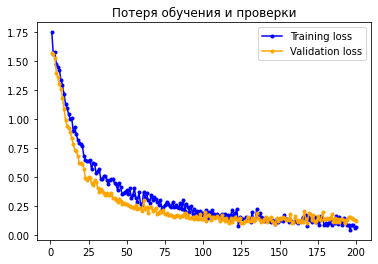

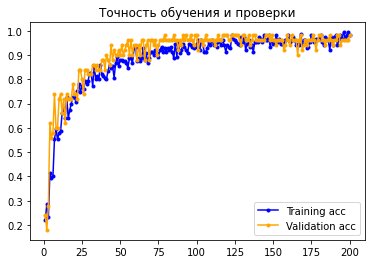

In [ ]:
#График обучения и проверки точности и потерь с течением времени
#Извлечение значений точности и потерь (в виде списка) из истории
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
#Создайте список номеров эпох
epochs = range(1, len(acc) + 1)
#График значений потерь при обучении и проверке с течением времени
plt.figure()
plt.plot(epochs, loss, color='blue', marker='.', label='Training loss')
plt.plot(epochs, val_loss, color='orange', marker='.', label='Validation loss')
plt.title('Потеря обучения и проверки')
plt.legend()
#Отображение точности обучения и проверки с течением времени
plt.figure()
plt.plot(epochs, acc, color='blue', marker='.', label='Training acc')
plt.plot(epochs, val_acc, color='orange', marker='.', label='Validation acc')
plt.title('Точность обучения и проверки')
plt.legend()
plt.show()

In [ ]:
#Попробуйте предсказать метку с одним проверочным образцом (вывод)
#Измените это, чтобы попробовать другой образец из тестового набора
idx = 9
#Создайте образец 2D-массива вместо 1D-вектора (это то, что модель Keras ожидает в качестве входных данных)
x = np.expand_dims(X_val[idx], 0)
# Сделайте прогноз, используя обученную модель
y_pred = model.predict(x)
# Найдите индекс наивысшего балла в выводе
predicted_label = np.argmax(y_pred)
actual_label = np.argmax(Y_val[idx])
# Отображение выходных данных модели, предсказанная метка, фактическая метка
print("Model output:", y_pred)
print("Predicted label:", predicted_label, "-", labels[predicted_label])
print("Actual label:", actual_label, "-", labels[actual_label])

Model output: [[8.9565496e-05 5.5669894e-05 2.4200104e-02 1.3120954e-03 9.7434253e-01]]
Predicted label: 4 - resistor
Actual label: 4 - resistor


In [ ]:
#Создайте матрицу путаницы из набора проверки
#Найдите прогнозы из всех проверочных образцов
Y_pred = model.predict(X_val)
print("Validation output shape:", Y_pred.shape)
#Преобразование фактической и прогнозируемой проверки однократного кодирования в числовые метки
y_val = np.argmax(Y_val, axis=1)
y_pred = np.argmax(Y_pred, axis=1)
#Распечатайте некоторые значения из фактических и прогнозируемых наборов проверки (первые 50 образцов)
print("Actual validation labels:\t", y_val[:50])
print("Predicted validation labels:\t", y_pred[:50])
#Вычислить матрицу путаницы (примечание: нам нужно транспонировать матрицу SKLearn, чтобы она соответствовала Edge Impulse)
cm = confusion_matrix(y_val, y_pred)
cm = np.transpose(cm)
#Распечатать матрицу путаницы
print()
print(" ---> Predicted labels")
print("|")
print("v Actual labels")
print("\t\t\t" + ' '.join("{!s:6}".format('(' + str(i) + ')') for i in range(num_classes)))
for row in range(num_classes):
  print("{:>12} ({}):  [{}]".format(labels[row], row, ' '.join("{:6}".format(i) for i in cm[row])))


Validation output shape: (50, 5)
Actual validation labels:	 [1 1 3 1 4 2 0 2 0 4 2 1 1 1 0 4 0 4 0 4 3 3 0 1 3 0 4 0 3 2 2 4 3 4 0 0 2
 4 4 3 3 0 4 1 3 2 4 1 0 0]
Predicted validation labels:	 [1 1 3 1 4 2 0 2 0 4 2 1 1 1 0 4 0 4 0 4 3 3 0 1 3 0 4 0 3 2 2 4 3 4 0 0 2
 2 4 3 3 0 4 1 3 2 4 1 0 0]

 ---> Predicted labels
|
v Actual labels
			(0)    (1)    (2)    (3)    (4)   
  background (0):  [    13      0      0      0      0]
   capacitor (1):  [     0      9      0      0      0]
       diode (2):  [     0      0      7      0      1]
         led (3):  [     0      0      0      9      0]
    resistor (4):  [     0      0      0      0     11]


In [ ]:
#Оценить модель на проверочном наборе
score = model.evaluate(X_val, Y_val)
print("Validation loss:", score[0])
print("Validation accuracy:", score[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.1242 - acc: 0.9800
Validation loss: 0.12421175092458725
Validation accuracy: 0.9800000190734863


In [ ]:
#Оценить модель на всем тестовом наборе
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.3146 - acc: 0.8600
Test loss: 0.31463563442230225
Test accuracy: 0.8600000143051147
